<a href="https://colab.research.google.com/github/PritBPatel1845/CaliforniaHousing/blob/main/CaliforniaHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt

In [ ]:
def load_housing_data(housing_path):
    return pd.read_csv("/content/drive/MyDrive/California Housing Project/housing.csv")

In [ ]:
housing = load_housing_data("/content/housing.csv")

In [ ]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
for col in housing.columns:
  print("---"*20)
  print(housing[col].value_counts())
  print("---"*20)

------------------------------------------------------------
longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.13      1
-123.43      1
-123.12      1
-116.27      1
-123.26      1
Name: count, Length: 844, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.53      1
35.86      1
35.85      1
35.89      1
41.20      1
Name: count, Length: 862, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     45

In [ ]:
for col in housing.columns:
  print(col)
  print(housing[col].isnull())

longitude
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: longitude, Length: 20640, dtype: bool
latitude
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: latitude, Length: 20640, dtype: bool
housing_median_age
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: housing_median_age, Length: 20640, dtype: bool
total_rooms
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_rooms, Length: 20640, dtype: bool
total_bedrooms
0        False
1        False
2        False
3        False
4        False
         ...  

longitude
0
latitude
0
housing_median_age
0
total_rooms
0
total_bedrooms
207
population
0
households
0
median_income
0
median_house_value
0
ocean_proximity
0


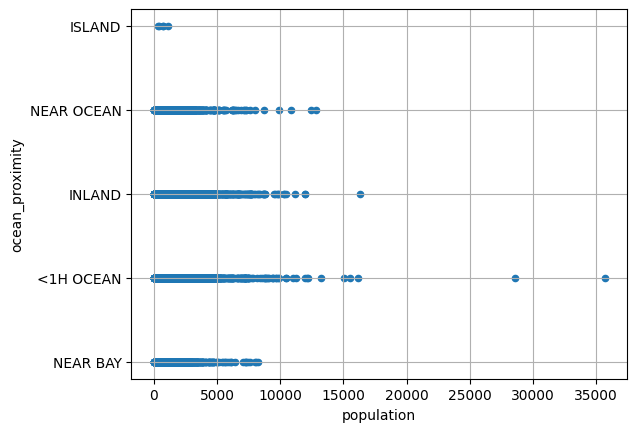

In [ ]:
for col in housing.columns:
  print(col)
  print(housing[col].isnull().sum())
housing.plot(kind='scatter', x='population', y='ocean_proximity', grid=True)
plt.show()

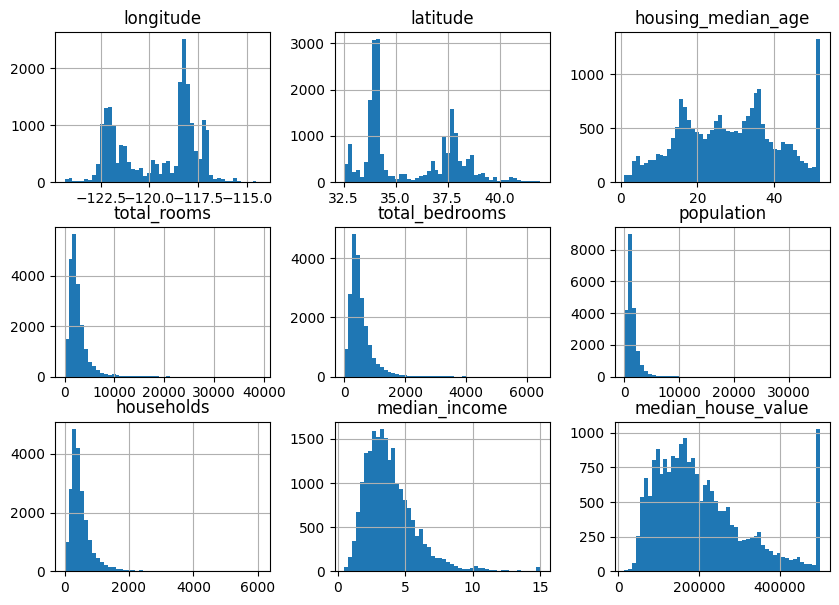

In [ ]:
housing.hist(bins=50, figsize=(10, 7))
plt.show()

In [ ]:
housing['median_income'].value_counts()

,count
median_income,
15.0001,49
3.1250,49
2.8750,46
2.6250,44
4.1250,44
...,...
3.6220,1
3.7238,1
4.6976,1


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

print("This is test Data", strat_test_set["income_cat"].value_counts())
print("This is train Data", strat_train_set["income_cat"].value_counts())

This is test Data income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64
This is train Data income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64


In [ ]:
housing = strat_train_set.copy()

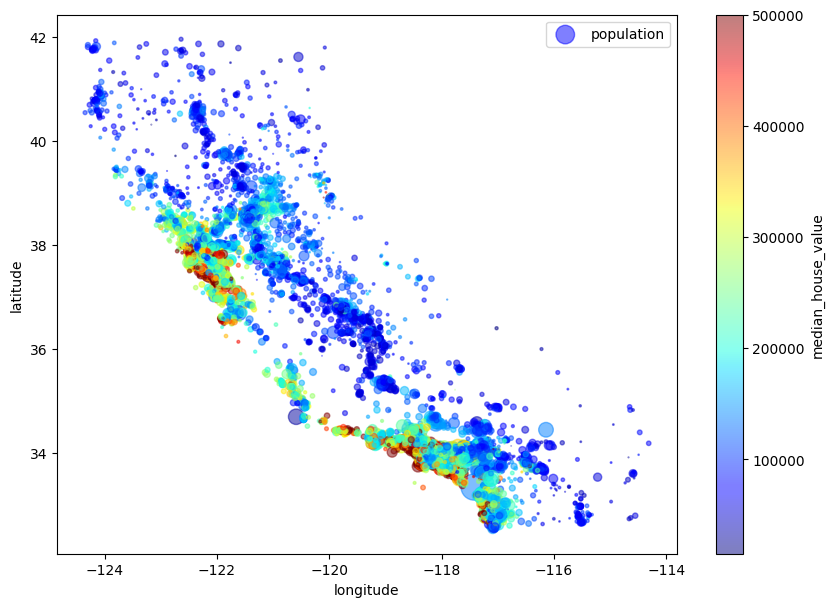

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

# Look at how much each attribute correlates with the median house value
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


In [ ]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')


In [ ]:
"""housing['total_bedrooms'].unique()"""
print(housing['total_bedrooms'].isnull().sum())
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)
print(housing['total_bedrooms'].isnull().sum())

158
0


/tmp/ipython-input-1927759802.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [ ]:
# Download the California image
import urllib

images_path = os.path.join("images", "/content/drive/MyDrive/California Housing Project/images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('/content/drive/MyDrive/California Housing Project/images/california.png',
 <http.client.HTTPMessage at 0x7e914295e6c0>)

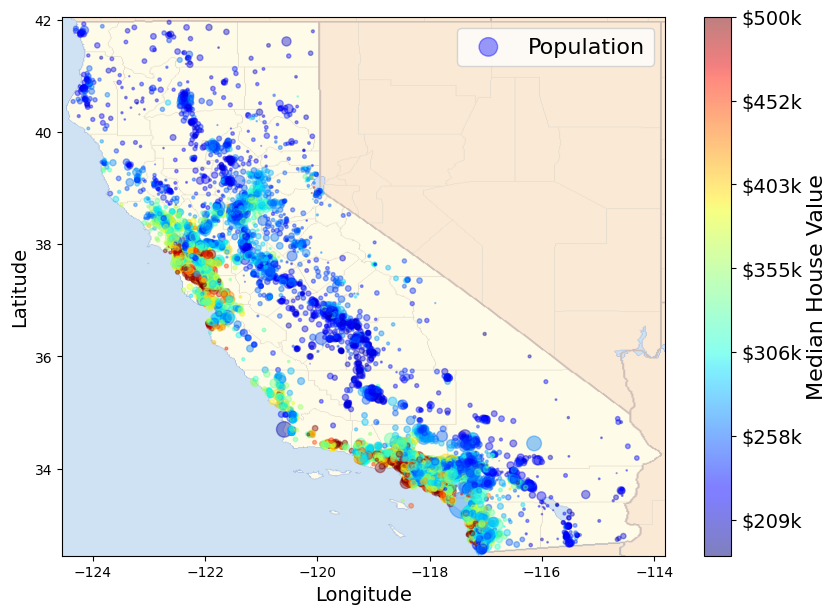

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.pyplot
import numpy as np
import os

# ... (Previous code to load data) ...

# FIX: Change c="median_house_value" to c=housing["median_house_value"]
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c=housing['median_house_value'],  # Pass the actual column data here
                  cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# Load the california_img
california_img = mpimg.imread(os.path.join(images_path, filename))

# The rest of your code
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot") # Ensure this function exists or comment it out
plt.show()
plt.savefig("california_housing_prices_plot.png")

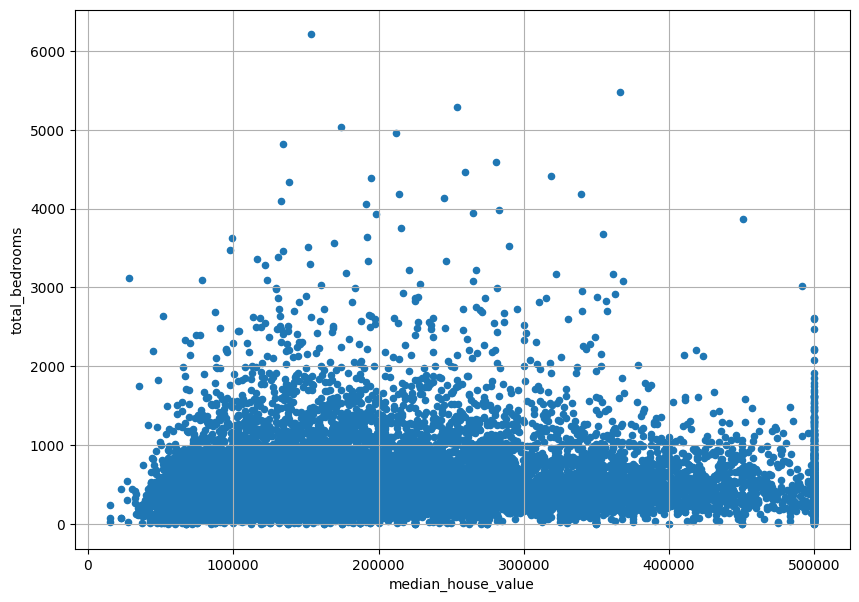

In [ ]:
housing.plot(kind='scatter', x='median_house_value', y='total_bedrooms', grid=True, figsize=(10,7))
plt.show()

In [ ]:
# 1. Separate Predictors and Labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# 2. Separate Numerical and Categorical columns
housing_num = housing.drop("ocean_proximity", axis=1) # Drop the text column
num_attribs = list(housing_num) # List of numerical column names
cat_attribs = ["ocean_proximity"] # List of categorical column names

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# A. Create the pipeline for Numerical Attributes
# 1. Fill missing values with the median
# 2. Scale features so they have mean 0 and variance 1
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# B. Create the Full Pipeline (combines Num and Cat)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),    # Apply num_pipeline to numerical columns
    ("cat", OneHotEncoder(), cat_attribs), # Apply OneHotEncoder to text columns
])

In [ ]:
# Run the pipeline on your training data
housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared.shape)
# Output should be something like (16512, 16)
# (Rows, 8 original num features + 5 one-hot encoded ocean features + any others you added manually)

(16512, 14)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# Important: We must transform this subset using the SAME pipeline logic
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 87710.9184376  312666.78080576 148193.92872405 181973.84391033
 242269.47566914]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

68866.78550087014
